# demo01_dt.ipynb 波士顿地区房屋价格预测

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
# 加载数据集
import sklearn.datasets as sd
boston = sd.load_boston()
# 把数据存入dataframe
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data['TARGET'] = boston.target
data.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT      TARGET  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [76]:
# 对某些字段进行简单的数据分析
data.pivot_table(index='CHAS', values=['TARGET'])

TARGET
CHAS           
0.0   22.093843
1.0   28.440000

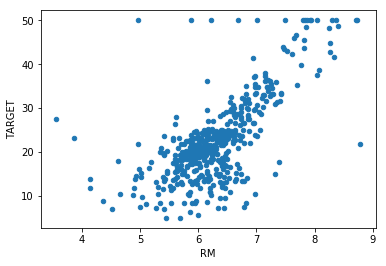

In [77]:
# 如果想使用这组数据训练线性模型，则要先验证特征与输出之间的关系是否是线性关系
data.plot.scatter(x='RM', y='TARGET')

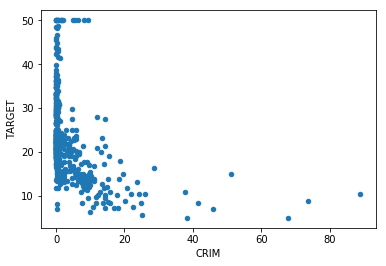

In [78]:
data.plot.scatter(x='CRIM', y='TARGET')

In [79]:
import sklearn.model_selection as ms
import sklearn.linear_model as lm
import sklearn.metrics as sm
# 整理输入集输出集，拆分测试集训练集
x, y = data.iloc[:, :-1], data['TARGET']
# random_state: 随机种子   对同一组数据使用相同的随机种子划分数据集，得到的结果是一样的。
train_x, test_x, train_y, test_y = \
    ms.train_test_split(x, y, test_size=0.1, random_state=7)
# 训练一个模型
model = lm.LinearRegression()
model.fit(train_x, train_y)
# 针对测试样本进行测试，评估
pred_test_y = model.predict(test_x)
print(sm.r2_score(test_y, pred_test_y))

0.7413627346309667


## 基于岭回归训练模型

In [80]:
# 训练一个模型
model = lm.Ridge()
model.fit(train_x, train_y)
# 针对测试样本进行测试，评估
pred_test_y = model.predict(test_x)
print(sm.r2_score(test_y, pred_test_y))

0.743708225508003


## 多项式回归

In [81]:
import sklearn.pipeline as pl
import sklearn.preprocessing as sp

model = pl.make_pipeline(sp.PolynomialFeatures(2), lm.Ridge())
model.fit(train_x, train_y)
# 针对测试样本进行测试，评估
pred_test_y = model.predict(test_x)
print(sm.r2_score(test_y, pred_test_y))

0.7745863848758201


## 基于决策树训练模型

0.8246942251799938


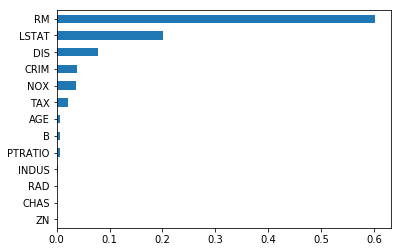

In [82]:
import sklearn.tree as st
# 训练一个模型
model = st.DecisionTreeRegressor(max_depth=6)
model.fit(train_x, train_y)
# 针对测试样本进行测试，评估
pred_test_y = model.predict(test_x)
print(sm.r2_score(test_y, pred_test_y))
# 获取特征重要性
fi = model.feature_importances_
s = pd.Series(fi, index=train_x.columns)
s.sort_values().plot.barh()

## AdaBoost

0.9129766685646226


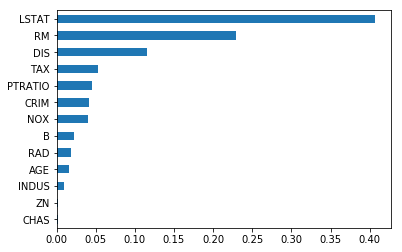

In [83]:
import sklearn.ensemble as se
model = st.DecisionTreeRegressor(max_depth=4)
model = se.AdaBoostRegressor(model, n_estimators=400, random_state=7)
model.fit(train_x, train_y)
# 针对测试样本进行测试，评估
pred_test_y = model.predict(test_x)
print(sm.r2_score(test_y, pred_test_y))
# 获取特征重要性
fi = model.feature_importances_
s = pd.Series(fi, index=train_x.columns)
s.sort_values().plot.barh()

## GBDT


In [84]:
# max_depth: 最大深度
# n_estimators: 弱模型的数量
# min_samples_split: 样本最小拆分数   若叶子节点样本数量小于该值，则不再向下拆分
params_a = [5,6,7,8,9]
params_b = [3,5,7,9]
for a in params_a:
    for b in params_b:
        model = se.GradientBoostingRegressor(
            max_depth=a, n_estimators=50, random_state=7, min_samples_split=b)
        model.fit(train_x, train_y)
        pred_test_y = model.predict(test_x)
        print(a, b, '->', sm.r2_score(test_y, pred_test_y))

5 3 -> 0.9052028706736212
5 5 -> 0.9008006784399825
5 7 -> 0.9035906494364427
5 9 -> 0.8936388772345275
6 3 -> 0.898994618657073
6 5 -> 0.9129204448776446
6 7 -> 0.9000562148451515
6 9 -> 0.89540462932096
7 3 -> 0.8942457230712019
7 5 -> 0.9041219519816024
7 7 -> 0.8821779696908856
7 9 -> 0.8920107793983777
8 3 -> 0.8848662310579254
8 5 -> 0.8914476045679828
8 7 -> 0.8892885451891566
8 9 -> 0.8904724614034893
9 3 -> 0.8781101072793871
9 5 -> 0.8893430671526077
9 7 -> 0.8507765340471639
9 9 -> 0.8641030567161463


## 随机森林回归

In [89]:
model = se.RandomForestRegressor(
    max_depth=9, n_estimators=400, min_samples_split=7)
model.fit(train_x, train_y)
pred_test_y = model.predict(test_x)
print(sm.r2_score(test_y, pred_test_y))

0.8967521128375593
